
學習資源：https://www.coursera.org/learn/convolutional-neural-networks/home/week/4

## Computer Vision Problems  
* Image Classification
* Object detection：將圖片中的所有欲偵測物體都圈起來，以辨識位置與距離。
* Neural Style Transfer：輸入圖片與風格圖像，將圖片轉換成特定風格。

挑戰：
輸入的圖片可能非常大，以64*64為例，輸入特徵x的維度是64*64*3(RGB)=12288；1M像素則是1000*1000*3=3000000，意指神經元中可能會有3百萬個參數，而這麼多的參數很難過得足夠的數據以避免神經網路過擬和，且3百萬個參數對計算量與內存的需求非常高。  

而卷積神經網路可以幫助計算擁有高像素的圖片。


卷積運算是組成卷積神經網路的基礎。  

### Edge Detection Example  
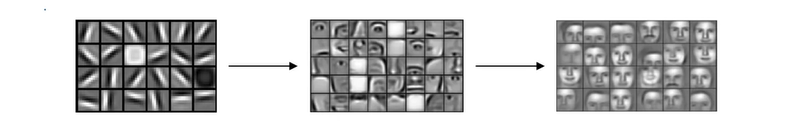  


假設先檢測圖中的垂直、水平邊緣。  
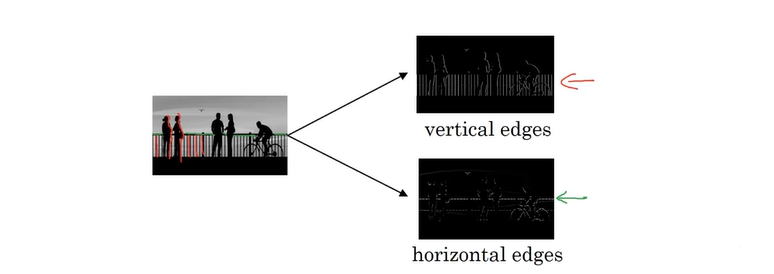

檢測方法：  
以下為6*6*1的矩陣，因為為灰度圖像，沒有分開的RGB通道，而為了檢測特定方向的邊緣，需建立一個3*3的矩陣(在pooling過程中用卷積的專業術語而言，這被稱為過濾器filter；核kernel)，卷積運算用 *表示(但在python中 *為元素乘法，因此用其他方式表示卷積運算)，輸出為一個4 *4的矩陣。  
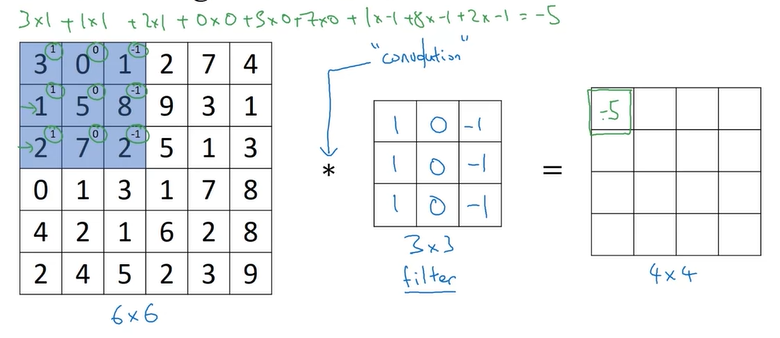
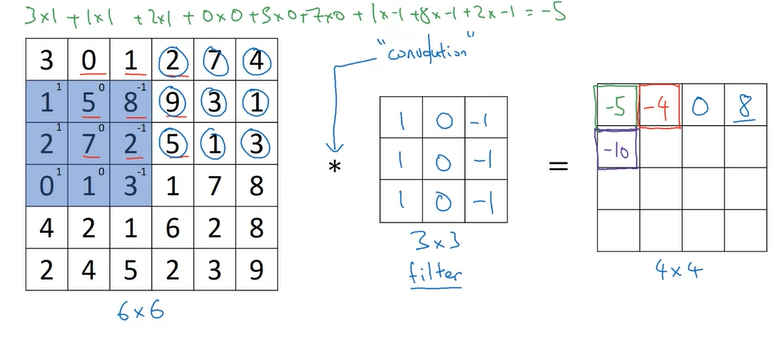  


<font color="red">※實現卷積運算的函式：</font>   
<font color="red">python:conv_forward</font>  
<font color="red">Tensorflow:tf.nn.conv2d</font>  
<font color="red">keras:Conv2D</font>

**範例**  
3*3矩陣中1為亮側，0忽略不重要的地方，-1為暗側。  
最後可得出邊緣在中間。
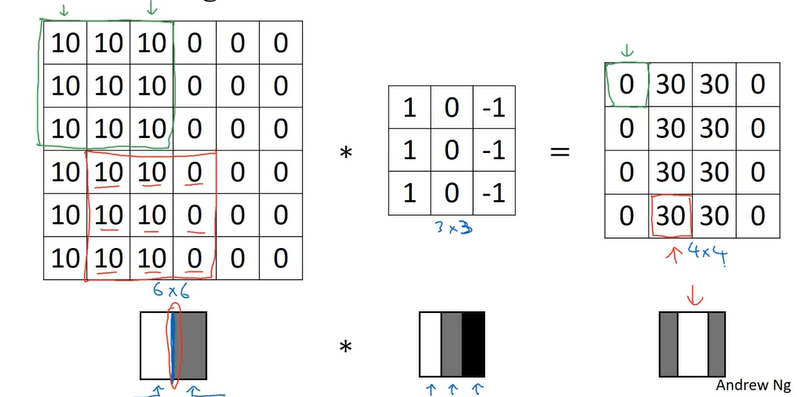  


由亮變暗：  
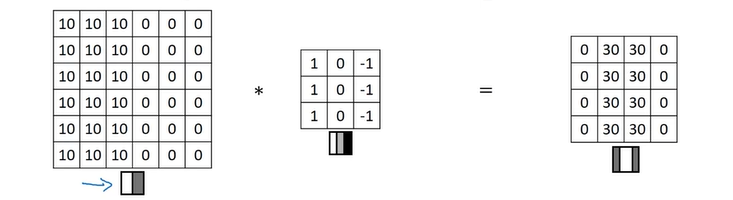

由暗變亮：  
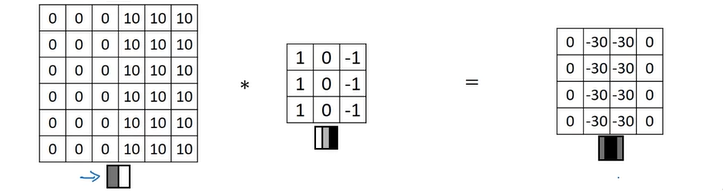


同理3*3的矩陣還可以檢測水平邊界。  
垂直邊界是左邊比較亮右邊比較暗，水平邊界則為上面比較亮下面比較暗。
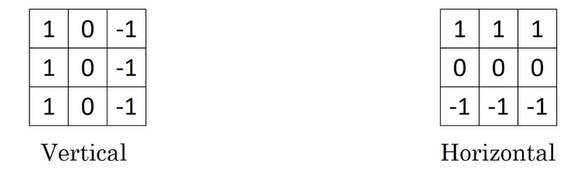

#### positive edges & negative edges  
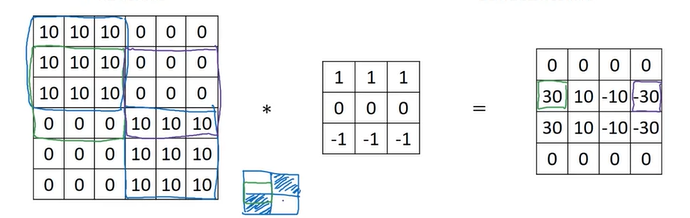


$\left[ \begin{array}{ccc:ccc}
    10 & 10 & 10 & 0 & 0 & 0 \\ \hdashline
    10 & 10 & 10 & 0 & 0 & 0 \\
    10 & 10 & 10 & 0 & 0 & 0 \\
    0 & 0 & 0 & 10 & 10 & 10 \\ \hdashline
    0 & 0 & 0 & 10 & 10 & 10 \\
    0 & 0 & 0 & 10 & 10 & 10
\end{array} \right]$
中的  

$\left[ \begin{array}{ccc:ccc}
    10 & 10 & 10 \\
    10 & 10 & 10 \\
    0 & 0 & 0  
\end{array} \right]*\left[ \begin{array}{ccc:ccc}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1  
\end{array} \right]=30$，表示在圖上的上半部較亮，因此得到正值。  
$\left[ \begin{array}{ccc:ccc}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    10 & 10 & 10  
\end{array} \right]*\left[ \begin{array}{ccc:ccc}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1  
\end{array} \right]=-30$，表示在圖上的下半部較亮，因此得到負值。  
10與-10則代表圖中介於明暗轉換的中間處。


#### 其他filter  
有許多能選擇的過濾器。  
除了剛剛範例中示範的過濾器之外。
$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1  
\end{array} \right]$  

**sobel filter**
$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1  
\end{array} \right]$
給予中間行更大的權重，而使結果更加穩定。  

**Scharr filter**
$\left[ \begin{array}{ccc}
    3 & 0 & -3 \\
    10 & 0 & -10 \\
    3 & 0 & -3  
\end{array} \right]$ 


除了特別為了檢測而挑選出這9個矩陣元素$\left[ \begin{array}{ccc}
    w_1 & w_2 & w_3 \\
    w_4 & w_5 & w_6 \\
    w_7 & w_8 & w_9  
\end{array} \right]$   
同理，也可以將這些元素當作9個參數，透過反向傳播去學習他們的數值，得到的權重進行卷積後的結果往往比工程師自行挑選的filter得出的偵測結果更加好。

### Padding(填充)  
當有$n$x$n$的圖片要使用一個$f$x$f$的過濾器時，輸出的維度會等於$(n-f+1)$x$(n-f+1)$  

缺點：
1. 每次進行卷積時圖像都會縮小。  
2. 圖片中央的像素最多可能進行9次卷積運算(使用3*3 fliter)，但圖片邊緣的像素只會進行一次卷積運算，而這會使運算過程中丟失很多靠近邊界的訊息。

為了同步改善上述兩種缺點，在卷積運算前可以先用一個額外的邊緣填充圖片(向邊緣拓展一個向素，填充的值為0)。  
以6*6的輸入圖片為例，填充後圖片變成8 *8，在卷積後圖片的大小為$(8-3+1)$x$(8-3+1)=6$x$6$，大小維持一致。  
填充的值可自由選擇，並不限於只能填充一個像素。
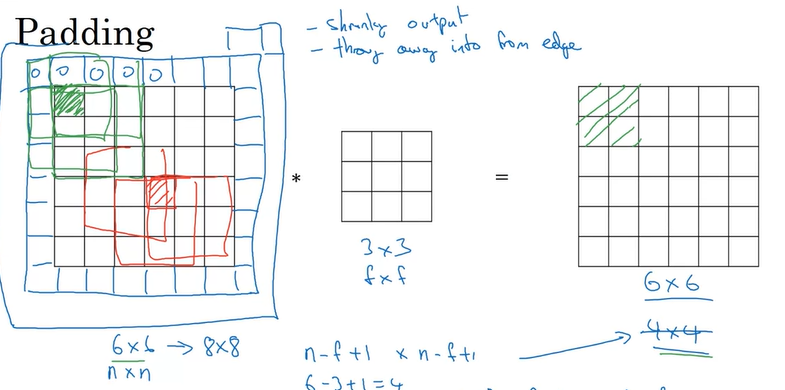

"Valid":沒有填充，$n$x$n*f$x$f\rightarrow(n-f+1)$x$(n-f+1)$  
"Same":填充後使輸出大小等於輸入大小，$n$x$n*f$x$f\rightarrow(n+2p-f+1)$x$(n+2p-f+1)=n$x$n\rightarrow(n+2p-f+1)=n\rightarrow p=\frac{f-1}{2}$  

※幾乎只會看到奇數的(f)構成fliter。

### Strided(步輻) Convolutions  
下圖中令stride=2(s=2)。  
公式：$n$x$n*f$x$f\rightarrow \lfloor\frac{n+2p-f}{s}+1\rfloor$x$\lfloor\frac{n+2p-f}{s}+1\rfloor$  
若計算的結果為分數，則會對分數求下限(floor(x))，因為若無法形成一個完整的藍色方框去與fliter卷積運算，則就略過那塊的計算。
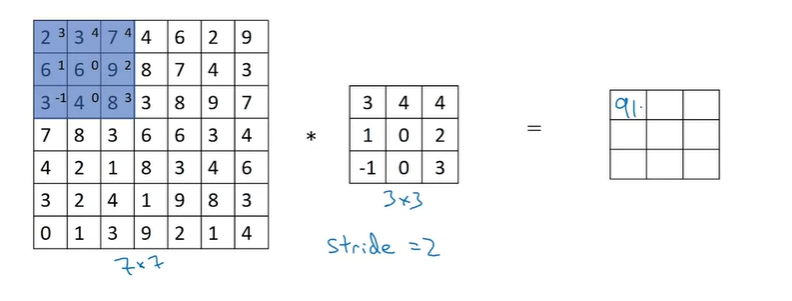
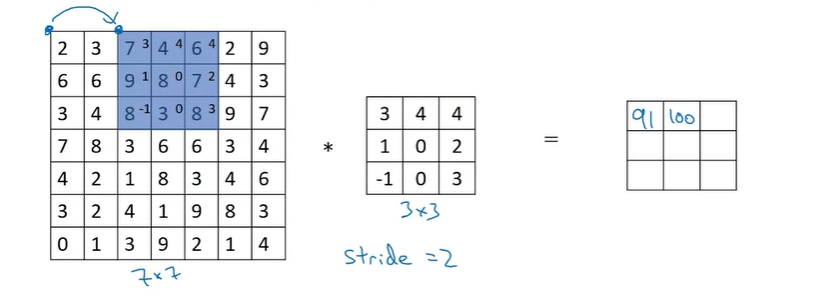
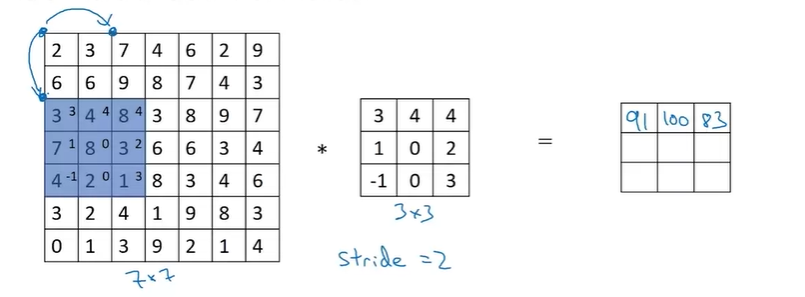

## Convolutions Over Volume  
對三維圖像進行卷積算法。  
ex.RGB影像，可視為3張6x6圖片疊加，此時fliter也要改為三維的。  
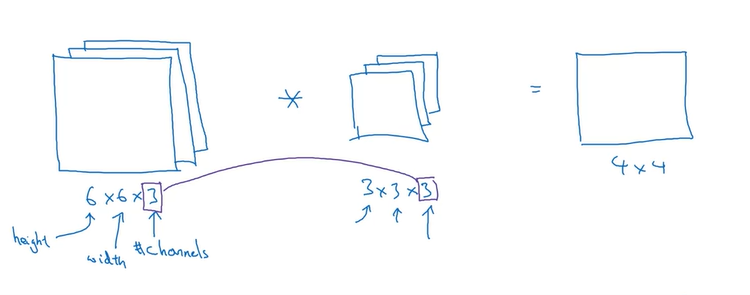  

輸入圖片的第一個6為圖片的高度，第二個6為圖片的寬度，第三個3為通道數量(channel)，fliter的通道數需跟輸入圖片的通道數一樣，最後輸出的為4x4x1的圖片。  

依照同樣的方法得到卷積運算結果，若想單獨知道紅色層的計算結果，可將3x3x3的fliter中後兩層的參數都設為0，形成$\left[ \begin{array}{ccc}
    0 & 0 & 0 \\
    0 & 0 &  \\
    0 & 0 & 0  
\end{array} \right]$，只留下第一層的參數，假設為$\left[ \begin{array}{ccc}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1  
\end{array} \right]$，如此去進行卷積運算後得出的結果就會只有第一層。 

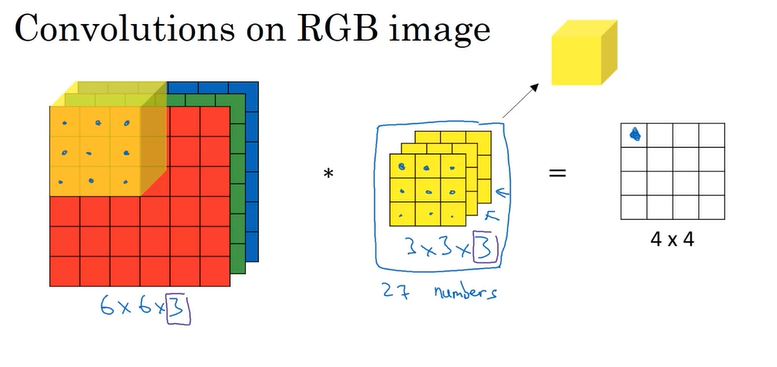

### Multiple fliters  
ex.同時計算垂直、水平，將通過不同fliter進行卷積運算後的輸出疊加在一起，得到4x4x2，2為fliter的數量。  
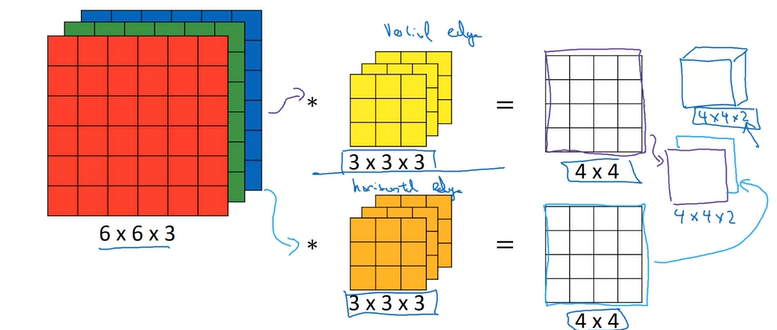

## One Layer of a Convolutional Network  
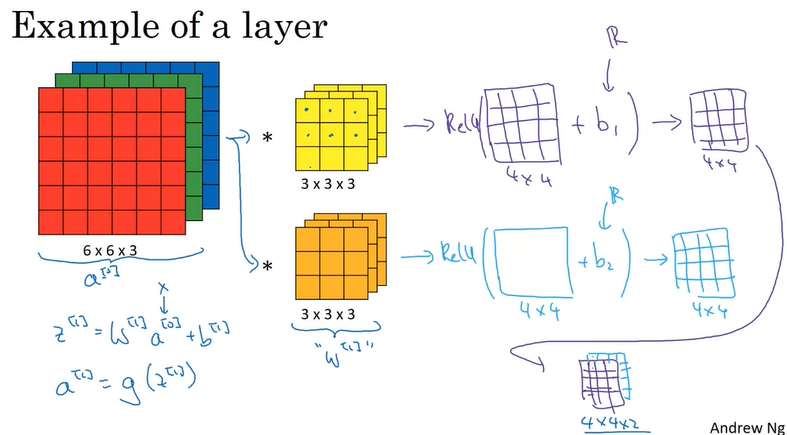
將上圖中的4x4輸出變成單層卷積神經網路，這個過程中需要將輸出加上bias(16個元素加上相同的偏差)，接著加入非線性轉換(ex.ReLU)，這些步驟處理完後會得到一個4x4的矩陣輸出，可將由不同fliter計算後的結果組合，得到4x4x2的輸出，即成為卷積神經網路中的一層。  
此層中的fliter作用和$w$類似，而計算後還未經ReLU更改的4x4輸出和$w^{[1]}a^{[0]}$相似，4x4輸出+$b_1$可視為$z$，最終經非線性方程處理後合併的輸出4x4x2可視為$a^{[1]}$，成為下一層的激活函數。  
最初輸入的6x6x3圖片為$a^{[0]}$。  
兩個fliter即代表兩個特徵。


**Example**  
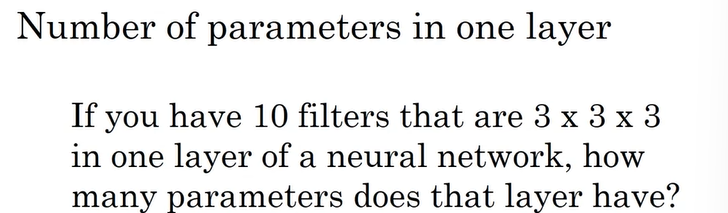  
3x3x3+1(bias)=28, 28x10=280  
此外注意不論輸入的圖片有多大，得到的參數都是280個。

### Summary of notation  
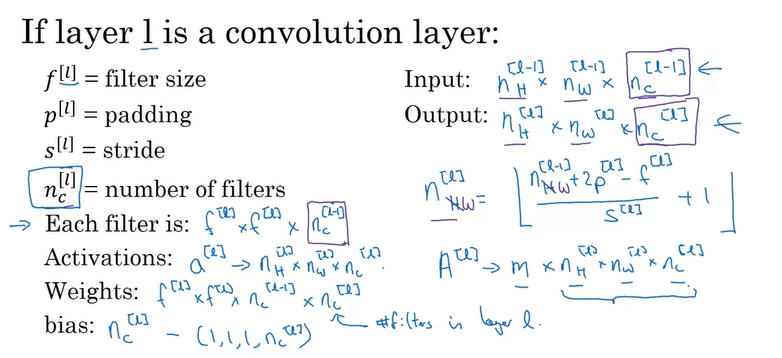